In [1]:
from IPython.core.display import HTML
HTML("""
<style>

        
div.cell { /* Tunes the space between cells */
    margin-top:1em;
    margin-bottom:3em;
}

div.text_cell_render { /* Customize text cells */
    font-family:  Times New Roman, Times, serif;
    font-weight: 500;
    font-size:1.2em;
    line-height:1.2em;
    padding-left:3em;
    padding-right:3em;
}
</style>
""")

# 重构KNN

前面我们接触的是函数式编程 (functional programming), 但在实际应用中, 通常大家会使用面向对象式的方式来实现算法.

## 描述

用面向对象的方式重构knn算法, 构建一个类, 叫做`KNN`

`KNN`具有三个属性: `k, X_train, y_train`

`KNN`具有两个方法: `fit 和 predict`

`fit` 有两个参数: `X_train` 和 `y_train`, 用来更新`KNN`的属性 `X_train, y_train`. 返回 `KNN`对象本身.

`predict` 有一个参数: `X_test`, 在预测完 `X_test` 的标签(类别)后返回所有的预测值.



## KNN类

部分代码已经写好, 在提示的地方完成KNN类

In [24]:
import numpy as np

np.isclose([3.0, 10], [2.9, 10.00001], atol=1e-5 )

array([False,  True], dtype=bool)

In [32]:
import numpy as np

def l2norm(u):
    return np.sqrt(np.sum(u ** 2))


def euclidean_dist(u, v):
    return l2norm(u - v)


def most_frequent(ar):
    u, indices = np.unique(ar, return_inverse=True)
    return u[np.argmax(np.bincount(indices))]

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        return self

    def predict(self, X_test):
        predictions = []
        for i, unknown_sample in enumerate(X_test):
            neighbours = []
            for j, observed_sample in enumerate(self.X_train):
                distance = euclidean_dist(unknown_sample, observed_sample)
                neighbours.append([distance, self.y_train[j]])
            neighbours = np.array(neighbours)
            knn = neighbours[neighbours[:, 0].argsort()][:self.k]
            predictions.append(most_frequent(knn[:, 1]))
        return np.ravel(predictions)

## 测试KNN类

用下面的代码测试你的KNN类

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# from sklearn.cross_validation import train_test_split
iris = pd.read_csv('iris.csv', delimiter=',')

X = iris[['Sepal length', 'Sepal width',
          'Petal length', 'Petal width']].as_matrix()
y = iris['Species'].as_matrix()

# 分割数据集, 67%的用于训练, 33%的用于测试
# X_train, X_test = 训练样本, 测试样本
# y_train, y_test = 训练目标, 测试目标
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

knn = KNN(k=3)

# 预测测试样本生成的目标: y_pred
y_pred = knn.fit(X_train, y_train).predict(X_test)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print('accuracy=%s' % accuracy(y_test, y_pred))

accuracy=1.0


# 可视化你的分类器

In [34]:
from matplotlib import pyplot as plt

def plot_bounds2D(X, y, clf):
    # create all pari-wise combinations of
    # x0's possible values and x1's possible values
    #
    # read here for more details:
    # https://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python

    d0_possible_values = np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1)
    d1_possible_values = np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1)

    d0, d1 = np.meshgrid(d0_possible_values, d1_possible_values)

    # create data set with d0 and d1 as two columns
    dots = np.c_[d0.ravel(), d1.ravel()]

    # num. rows = 1, num. cols = 1, plotting 1st subplot
    plt.subplot(1, 1, 1)

    plt.subplots_adjust(wspace=0.6, hspace=0.4)
    dots_predicted = clf.fit(X[:, [0, 1]], y).predict(dots)
    
    # convert possible string labels to numerical label for plotting
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder().fit(dots_predicted)
    coloured_dots = le.transform(dots_predicted)
    
    # Put the result into a color plot
    coloured_dots = coloured_dots.reshape(d0.shape)
    
    plt.contourf(d0, d1, coloured_dots, cmap=plt.cm.coolwarm, alpha=0.8)
#     plt.pcolormesh(d0, d1, coloured_dots, cmap=plt.cm.coolwarm)

    # Plot also the training points
    plt.xlim(d0.min(), d0.max())
    plt.ylim(d1.min(), d1.max())

    # plot the line, the points, and the nearest vectors to the plane
    plt.xlabel('X[:, 0]')
    plt.ylabel('X[:, 1]')

    for yy in np.unique(y):
        plt.scatter(x=X[:, 0][y == yy], y=X[:, 1][y == yy], label='y_train==' + str(yy))
    plt.legend()

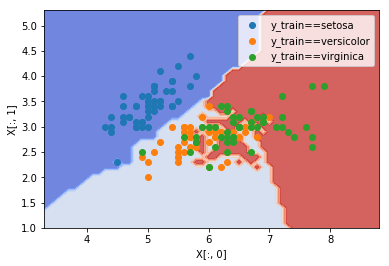

In [37]:
from matplotlib import pyplot as plt
plot_bounds2D(X[:,[0,1]], y, KNN(k=3))
plt.show()

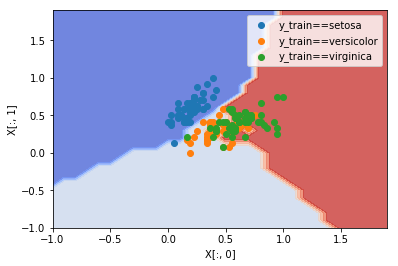

In [38]:
def normalise(x):
    return (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

Xn = normalise(X[:,[0,1]])
plot_bounds2D(Xn, y, KNN(k=3))
plt.show()

## `sklearn` 的 KNN分类器

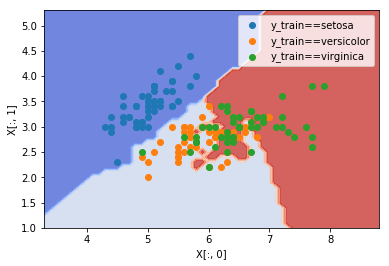

In [39]:
from sklearn.neighbors import KNeighborsClassifier

plot_bounds2D(X[:,[0,1]], y, KNeighborsClassifier(3))
plt.show()

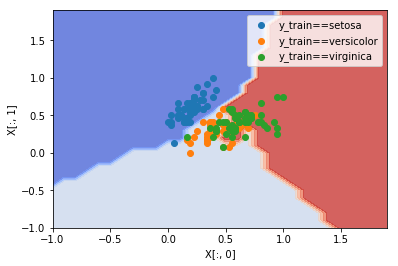

In [40]:
from sklearn.neighbors import KNeighborsClassifier

def normalise(x):
    return (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

Xn = normalise(X[:,[0,1]])
plot_bounds2D(Xn, y, KNeighborsClassifier(3))
plt.show()

## `hstack`, `vstack`, `stack`

In [42]:
M = np.arange(12).reshape(3,4)
M

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

切割产生 1d ndarray

In [49]:
m0 = M[:, 0]
m1 = M[:, 1]
m0.ndim, m1.ndim

(1, 1)

In [63]:
np.hstack([m0, m1])

array([0, 4, 8, 1, 5, 9])

In [48]:
np.vstack([m0, m1]).T

array([[0, 1],
       [4, 5],
       [8, 9]])

切割产生2d ndarray

In [52]:
M0 = M[:, [0, 1] ]
M1 = M[:, [2, 3] ]
M3 = M[:, [3] ]
M0.ndim, M1.ndim, M3.ndim

(2, 2, 2)

In [57]:
M0, M1

(array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]]))

In [56]:
np.hstack([M0, M1])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
np.vstack([M0, M1])

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [ 2,  3],
       [ 6,  7],
       [10, 11]])

In [74]:
M0.shape

(3, 2)

In [73]:
np.stack([M0, M1], axis=0).shape

(2, 3, 2)

In [81]:
np.stack([m0, m1], axis=0).shape

(2, 3)

## `LabelEncoder`, `bincount`, `argmax`

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(['a', 'vvvv', 'ssss', 'ssss', 'a'])
le.transform(['a', 'ssss', 'ssss', 'a'])

array([0, 1, 1, 0], dtype=int64)

In [85]:
le.inverse_transform([2, 1, 0])

array(['vvvv', 'ssss', 'a'], 
      dtype='<U4')

In [86]:
np.bincount([1,2,2,2,1,1,1,5])

array([0, 4, 3, 0, 0, 1], dtype=int64)

In [87]:
np.argmax([0, 4, 3, 0, 0, 1])

1